In [46]:
import random
import numpy as np

def circle():
  x1 = []
  x2 = []
  classes = []
  counter = 0
  while counter < 600:
    x = random.uniform(0, 10)
    y = random.uniform(0, 10)
    if (x - 3)**2 + (y - 3)**2 <= 1:
      counter += 1
      x1.append(x)
      x2.append(y)
      classes.append(0)
  return x1, x2, classes

def straight():
  x1 = []
  x2 = []
  classes = []
  for i in np.arange(0, 6, 0.01):
    x1.append(i)
    x2.append(i*0.2)
    classes.append(1)
  return x1, x2, classes

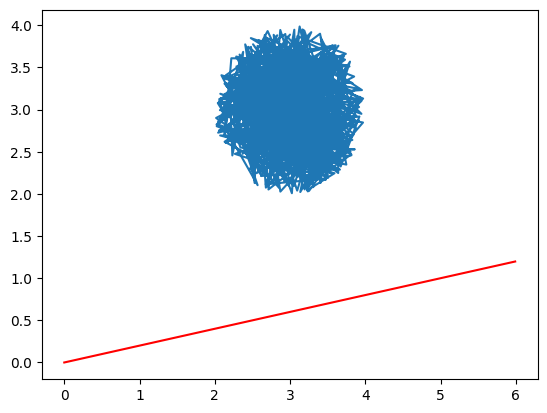

In [47]:
from matplotlib import pyplot as plt

x1, x2, classes = circle()
plt.plot(x1, x2)
x1, x2, classes = straight()
plt.plot(x1, x2, color="red", alpha=1)
plt.show()

In [48]:
import pandas as pd

x1, x2, classes = circle()
df1 = pd.DataFrame({'x1': x1, 'x2': x2, 'class': classes})
x1, x2, classes = straight()
df2 = pd.DataFrame({'x1': x1, 'x2': x2, 'class': classes})
df = pd.concat([df1, df2])
df

,x1,x2,class
0,2.982968,2.551741,0
1,2.447151,2.986565,0
2,2.741711,3.368664,0
3,2.522668,3.541266,0
4,2.803440,2.958268,0
...,...,...,...
595,5.950000,1.190000,1
596,5.960000,1.192000,1
597,5.970000,1.194000,1
598,5.980000,1.196000,1


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X, y = df[['x1', 'x2']], df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"{round(accuracy_score(y_test, y_pred) * 100)}% accuracy")

100% accuracy
